# Loading data from Masakhane folder

In [ ]:
!pip install pandas python_crfsuite summarytools sklearn_crfsuite

In [2]:
from pathlib import Path
import pandas as pd

In [1]:
'/'.isalnum()

False

In [26]:
# Reading folder path
# Context Masahkane community
# Ramshaw and Marcus (1995) = IOB data format

bbj_ner_path = Path('/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/data_source/masakhane-ner/MasakhaNER2.0/data/bbj')
dev_data_path   = bbj_ner_path / 'dev.txt'
train_data_path = bbj_ner_path / 'train.txt'
test_data_path  = bbj_ner_path / 'test.txt'


def check_ner_type(ner_data):
    if 'I-DATE' in ner_data or 'B-LOC' in ner_data or 'B-PER' in ner_data \
        or 'I-PER' in ner_data or 'B-DATE' in ner_data or 'B-ORG' in ner_data \
        or 'I-ORG' in ner_data or 'I-LOC' in ner_data:
        return True
    else: return False

# function that read IOB file and build data structure for train, test and dev
def read_format_iob_data(filename):
    sents_id, words, iob_tag = [], [], []
    all_extracted_data, only_ner_data, o_ner_data = [], [], []
    with open(filename, encoding='utf-8') as iob:
        sentence, id_sent, tags = [], 1, []
        for line in iob:
            if len(line) > 1:
                word, tag = line.strip().split(' ')
                sentence.append((word, tag))
                sents_id.append(id_sent)
                words.append(word)
                iob_tag.append(tag)
                tags.append(tag)
            else:
                sentence.append(('.', 'O'))
                sents_id.append(id_sent)
                words.append('.')
                iob_tag.append('O')
                all_extracted_data.append(sentence)
                if check_ner_type(tags): only_ner_data.append(sentence)
                else: o_ner_data.append(sentence)
                sentence = []
                id_sent += 1
                tags = []
    dataframe = {"sentence_id": sents_id, "word": words, "iob_tag": iob_tag}
    pd_iob_data = pd.DataFrame.from_dict(dataframe)
    return all_extracted_data, pd_iob_data, only_ner_data, o_ner_data
# 

In [27]:
# read and extract iob data
extracted_train_data, pd_train_data, only_train_ner_data, o_train_ner_data = read_format_iob_data(train_data_path)
extracted_test_data, pd_test_data, only_test_ner_data, o_test_ner_data = read_format_iob_data(test_data_path)
extracted_dev_data, pd_dev_data, only_dev_ner_data, o_dev_ner_data = read_format_iob_data(dev_data_path)

# quelques stats liminaires
print("Total number of sentences in the train dataset: {:,}".format(pd_train_data["sentence_id"].nunique()))
print("Total words in the train dataset: {:,}".format(pd_train_data.shape[0]))
print("Total number of sentences in the test dataset: {:,}".format(pd_test_data["sentence_id"].nunique()))
print("Total words in the test dataset: {:,}".format(pd_test_data.shape[0]))
print("Total number of sentences in the dev dataset: {:,}".format(pd_dev_data["sentence_id"].nunique()))
print("Total words in the dev dataset: {:,}".format(pd_dev_data.shape[0]))


Total number of sentences in the train dataset: 3,384
Total words in the train dataset: 50,623
Total number of sentences in the test dataset: 966
Total words in the test dataset: 15,924
Total number of sentences in the dev dataset: 483
Total words in the dev dataset: 7,745


In [29]:
only_train_ner_data 

[[('Cameroon', 'B-ORG'),
  ('Tribune', 'I-ORG'),
  ('ntâmgǒ', 'B-DATE'),
  ('13', 'I-DATE'),
  ('fə̀fə̀', 'I-DATE'),
  ('2021', 'I-DATE'),
  ('.', 'O')],
 [('Ŋwâlâʼ', 'O'),
  ('nə̂ntʉɔ', 'O'),
  ('kə', 'O'),
  ('yó', 'O'),
  ('ŋké', 'O'),
  ('cúʼtə', 'O'),
  ('Yawude', 'B-LOC'),
  ('nə́', 'O'),
  ('gɔ́m', 'O'),
  ('páʼ', 'O'),
  ('pú', 'O'),
  ('wə́', 'O'),
  ('dóʼ', 'O'),
  ('gho', 'O'),
  ('lə', 'O'),
  ('.', 'O')],
 [('Ŋwâlâʼ', 'O'),
  ('nə̂ntʉɔ', 'O'),
  ('kə', 'O'),
  ('ŋwǎk', 'O'),
  ('dyə́', 'O'),
  ('gɔ́m', 'O'),
  ('páʼ', 'O'),
  ('gho', 'O'),
  ('lâʼlǎʼ', 'O'),
  ('wə́', 'O'),
  ('nə́', 'O'),
  ('bə́', 'O'),
  ('Kaməlûm', 'B-LOC'),
  ('lə', 'O'),
  ('.', 'O')],
 [('Ba', 'O'),
  ('mpáʼ', 'O'),
  ('ǎ', 'O'),
  ('ntʉ́m', 'O'),
  ('təŋláʼ', 'B-LOC'),
  ('kə́ŋshyə', 'I-LOC'),
  ('bə', 'O'),
  ('dəŋ', 'O'),
  ('msyap', 'O'),
  ('myə', 'O'),
  ('a', 'O'),
  ('ŋwak', 'O'),
  ('á', 'O'),
  ('cyə', 'O'),
  ('deŋ', 'O'),
  ('myə', 'O'),
  ('pú', 'O'),
  ('hə́ŋ', 'O')

# Analyzing data 

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
# quantification des tags/phrases dans le corpus d'entrainement
# credit: https://github.com/6chaoran/jupyter-summarytools
from summarytools import dfSummary, tabset

tabset({
    "train_data": dfSummary(pd_train_data).render(),
    "test_data": dfSummary(pd_test_data).render(),
    "dev_data": dfSummary(pd_dev_data).render()
})

# Un controle visuel des données et ce tableau montre clairement qu'il y a 
# des problématiques de cohérence d'annotations avec l'usage du format IOB.

/tmp/ipykernel_25136/3278589131.py:6: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  "train_data": dfSummary(pd_train_data).render(),
/tmp/ipykernel_25136/3278589131.py:7: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  "test_data": dfSummary(pd_test_data).render(),
/tmp/ipykernel_25136/3278589131.py:8: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  "dev_data": dfSummary(pd_dev_data).render()


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,sentence_id[int64],Mean (sd) : 1723.3 (1003.2)min < med < max:1.0 < 1745.0 < 3384.0IQR (CV) : 1804.0 (1.7),"3,384 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACv0lEQVR4nO3dv27aUBiG8e9AACdBRigt2bJ0rNSBkYvoxfYSgsQVMHTplA0JIRBuEI6hQ0VVqeKPz7GLX+f5regklvPo+HyAFLff7w2ousa1LwC4xM21LwD14Zy7NbO25/Ltfr9/PfYioaIQzrnbh4eHr3Ec933Wr1arhXPu27FYCRVFacdx3B+NRq+9Xm+TZ+FyuYwmk0l/Pp+3zYxQUb5er7cZDAY/PZbennqRYQoSCBUSSn30B06BZmcmQbwfpYUaOgWanZ8E8X6UuaN6T4Fml02CKFbgEzDe7XatIq/nb6VP/QFToGVZFptZ7JzzWc6xIYfQJ2CaplGWZZ83m82zmXn9vU+p7NtTSZK00jT98vT01Gw2m7l3ZI4NuQU9AV9eXvrT6fTu7e2tWcbFVTbU7XZ7E0XR3XA43Dw+Pi7yrFU+Nlx7APV9Ai4Wi5Pvg4Y6G2rAjSvkzHJ/f1/KG8hVxAB63MlQQ25c2WeWmgoeQMfj8WA+n39wzq1yLi91GAp1bkf1vnFln1nqzPfxG3Kur/rGctEZ1efGlX1mwb9CzvVV31gqO0wpUzzXV31jIdSCca4vR21DzbKsZf4fFpj9/sLOzmNd3O12B6PRaMW5vji1DDX0w4Isy1pJknzqdrs/Go1GmmftYVfsdDrPdXv8XlMtQw0ZKsz+7Gwfh8Ph97oNJapqGeqB74cFh52tjkOJKr44DQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgkX/Xfp5XIZ5f3B6/U6MjNLkiSazWZ3/3O96u9Wve7Q9Zf09QtexpTk23HM8wAAAABJRU5ErkJggg=="">",0(0.0%)
2,word[object],1. .2. nə́3. pú4. bə́5. lə6. á7. nə̂8. yə9. gaə́10. bə11. other,"5,220 (10.3%)1,296 (2.6%)819 (1.6%)719 (1.4%)684 (1.4%)633 (1.3%)601 (1.2%)539 (1.1%)497 (1.0%)484 (1.0%)39,131 (77.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAERElEQVR4nO3dQWobZwCG4d9CpNFmhDD4GDmADpHD9hA6gO9hjGcRudm4i9ghbtKWOJ5XRnmenRcSA3kZoeH/oouHh4cBhdWpL4Dfh9jIiI2M2MiIjYzYyIiNjNjIiI3MxRhjM8Z49wvv8fnh4eH4StfDGVtfXl5+nKZp99I3mOf59uLi4k/B8X/W0zTt9vv9cbvd3v/si+/u7t4fDofdzc3NuzGG2PhP6zHG2G6391dXV59e+B6bV7wezpgvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY9xpdzaS958Utfx+9pPc/z7eFw2I0Xnkub5/l2jPH5dS+Lc2SDQObCf5lF5Ud3NncqFvHduspaiqU8W1dZS7GkH62rrKVYhIe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZJ4NXgxYWNJ3gxcDFpbiWDgZgxcy/7yzuauxmGeDF2MXlrR6Grzs9/vjY3S/MliGf/V18PL4t7ELi/FQl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcwv/cIL/IxvBy/GLizKsXAyBi9kfEEg8+3HqI9QFvV1XWVZxdJW0zTtPnz4MCyrWNpqjDE2m81fp74Qzp8vCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGRWY4xxPB7/OPWFcP5W8zzfXl9fW1axOMfCyVhXkXFnI2PwQsbghYzBCxkPdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWDgZgxcy7mxkDF7IGLyQMXgh46EuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxgaBjHUVGXc2MtZVZKyryFhXkfFQl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeCHjzkbG4IWMwQsZgxcyHuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZHxBIONjlIx1FRnrKjLWVWR8QSAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjXUXGuoqMY+FkrKvIPN3ZhrsaS1tfXl5+HGMMYxeWtpqmaWfsQsFzNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MuvHocsYxi4szLFwMgYvZL6d8nGe3sxE8+svvJz6QljGW/rlnvU0Tbv9fn/cbrf3p74YXtfd3d37w+Gwu7m5eTfGOH1sY4yx3W7vr66uPp36YljE5tQX8MRzNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLrMb4cRTn1hfD63tq/63qe59vD4bAbb+goCq/nLf1yj2Ph5+/NHAs3eCHjCwIZsZERGxmxkREbGbGRERsZsZERG5m/AVY1x/TcNEQSAAAAAElFTkSuQmCC"">",0(0.0%)
3,iob_tag[object],1. O2. I-DATE3. B-LOC4. B-PER5. I-PER6. B-DATE7. B-ORG8. I-ORG9. I-LOC,"45,315 (89.5%)1,122 (2.2%)772 (1.5%)741 (1.5%)731 (1.4%)598 (1.2%)581 (1.1%)573 (1.1%)190 (0.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADU0lEQVR4nO3cMW4aaQCG4R+EkqUZhJB8DB+AQ+SwOQQH8D0sy1Ms2TSkWCdKUlhaY1522efpXCBN8WpgRv/nxel0GlBYXvsC+P8QGxmxkREbGbGRERsZsZFZjDHWY4wP174Q/hO+nk6n41s/vNrtdp+madq+5xVxm+Z5flosFp/fGtxqmqbtfr8/bjabL+99cdyO5+fnPw6Hw/bx8fHDGONtsY0xxmaz+XJ3d/fnu14dt2h9zoc9IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZFZjfH38ZFrXwj/bu/RyGqe56fD4bAdZx4f4

<AxesSubplot: >

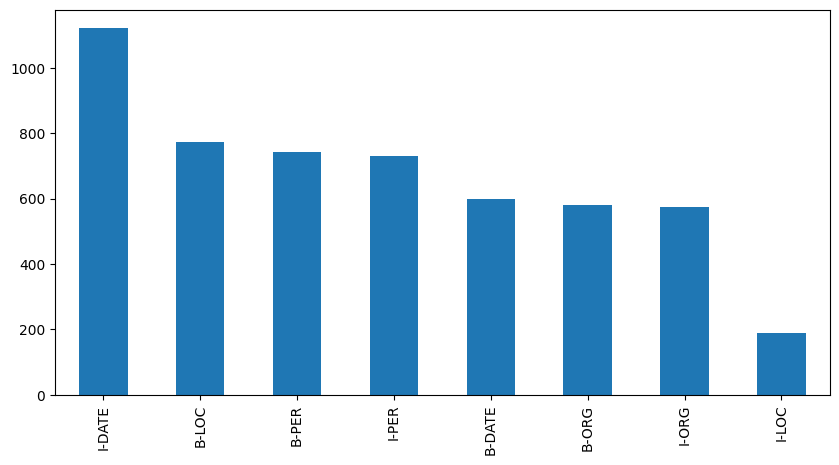

In [6]:

pd_train_data[pd_train_data.iob_tag != 'O']["iob_tag"]\
.value_counts().plot(kind="bar", figsize=(10,5))

# On remarque ici que le tag date représente 40% des tags (en position I ou B)

La phrase la plus longue contient 46 mots.
ID de la plus longue phrase 3158.

La phrase la plus longue du corpus est:
 Nwə yə pú kə yɔ̌ tyə̂' 27 nə́ Sûnè 2020 Tá lə Ondo André Marie ( Mle 599 438 - T ) Tâdyə̌ mkətú' bə ě tʉɔthə́ bí pə dzə̌ é nə́ŋ cyə̂ mnə́ hɔ̂ bí nə́ pîŋ pú a fa' yə pǐŋ lə . .


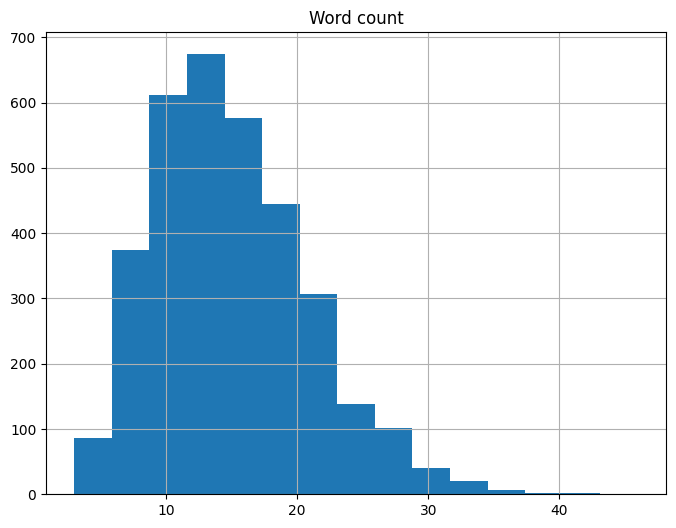

In [7]:

word_counts = pd_train_data.groupby("sentence_id")["word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})
word_counts.hist(bins=15, figsize=(8,6))

# On constate que le nombre de mots moyens par phrase est de 15
MAX_LENGTH_SENTENCE = word_counts.max()[0]
print("La phrase la plus longue contient {} mots.".format(MAX_LENGTH_SENTENCE))
longest_sentence_id = word_counts[word_counts["Word count"]==MAX_LENGTH_SENTENCE].index[0]
print("ID de la plus longue phrase {}.".format(longest_sentence_id))
longest_sentence = pd_train_data[pd_train_data["sentence_id"]==longest_sentence_id]["word"].str.cat(sep=' ')
print(f"\nLa phrase la plus longue du corpus est:\n {longest_sentence}")


In [8]:
all_words = list(set(pd_train_data["word"].values))
all_tags = list(set(pd_train_data["iob_tag"].values))

print("Nombre de mots uniques: {}".format(pd_train_data["word"].nunique()))
print("Nombre de tags uniques : {}".format(pd_train_data["iob_tag"].nunique()))

Nombre de mots uniques: 8604
Nombre de tags uniques : 9


# Features engineering

In [9]:
import unidecode
import re
from datetime import datetime
import string
import math
import unicodedata

In [10]:
words_caracters = set([y.lower() for x in all_words for y in x])
all_caracters = string.punctuation+string.ascii_letters+string.digits+''
tone_caracters = list(set([x for x in words_caracters if x not in all_caracters]))
cpm_search = re.compile(str(tone_caracters))
print(tone_caracters)

['è', 'ǎ', '̂', '̣', '̌', 'ǝ', 'ʉ', '°', '©', 'à', '́', 'ì', 'æ', 'ô', 'ǔ', 'ú', 'ç', 'ɨ', 'ǐ', 'ë', 'ó', 'î', 'œ', 'ɛ', 'ù', 'ͻ', 'â', 'ẅ', 'ə', '᷆', 'ɗ', '᷅', 'í', 'ŋ', 'ò', '̀', 'ƴ', '×', 'ě', 'ᵾ', 'ǒ', '̧', 'ɑ', 'ø', 'ï', 'ʼ', 'û', 'ş', 'ꞌ', 'é', 'ɔ', 'á', 'ɓ', 'ê']


In [13]:
bantou_tones = [f"{x} " for x in " ́̄̀̌̂" if x != " "]
string_tones = "".join(bantou_tones)
tones_search = re.compile(string_tones)
print([x for x in "ntâmgǒ"])
print(tone_caracters, string_tones)

bantou_letters = string.ascii_letters+"ǝɔᵾɓɨşœɑʉɛɗŋøẅëïə"


def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    #print([x for x in nfkd_form if x not in string.ascii_letters])
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode('utf8')

def extract_tone(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    #print([x for x in nfkd_form if x not in string.ascii_letters])
    tones = [x for x in nfkd_form if x not in bantou_letters]
    return " ".join(tones)

def number_tone_word(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    len_tone_str = len([x for x in nfkd_form if x not in bantou_letters])
    return len_tone_str

def word_decomposition(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    word_decomp = " ".join([x for x in nfkd_form ])
    return word_decomp

def compare_two_words(input_str1, input_str2):
    nfkd_form1 = unicodedata.normalize('NFKD', input_str1)
    nfkd_form2 = unicodedata.normalize('NFKD', input_str2)
    len_tone_str1 = len([x for x in nfkd_form1 if x not in bantou_letters])
    len_tone_str2 = len([x for x in nfkd_form2 if x not in bantou_letters])
    only_ascii = nfkd_form1.encode('ASCII', 'ignore')
    return only_ascii.decode('utf8')

non_tone = remove_accents("fə̀fə̀")
print(len("fə̀fə̀"), len(non_tone), number_tone_word("fə̀fə̀"), 
      "---"+extract_tone("fə̀fə̀"))

['n', 't', 'â', 'm', 'g', 'ǒ']
['è', 'ǎ', '̂', '̣', '̌', 'ǝ', 'ʉ', '°', '©', 'à', '́', 'ì', 'æ', 'ô', 'ǔ', 'ú', 'ç', 'ɨ', 'ǐ', 'ë', 'ó', 'î', 'œ', 'ɛ', 'ù', 'ͻ', 'â', 'ẅ', 'ə', '᷆', 'ɗ', '᷅', 'í', 'ŋ', 'ò', '̀', 'ƴ', '×', 'ě', 'ᵾ', 'ǒ', '̧', 'ɑ', 'ø', 'ï', 'ʼ', 'û', 'ş', 'ꞌ', 'é', 'ɔ', 'á', 'ɓ', 'ê'] ́ ̄ ̀ ̌ ̂ 
6 2 2 ---̀ ̀


In [66]:
# l'ajout des tags suivants au mot courant améliore signficativement le modèle
# l'ajout des informations sur les tons

def word2features(sent, i):
    word = sent[i][0]
    tagword = sent[i][1]
    len_tone = number_tone_word(word)
    len_word = len(word) / 2
    features = {
        'bias': 1.0,
        'word': word,
        'word.tones': extract_tone(word),
        'word.normalized': unicodedata.normalize('NFKD', word),
        'word.letters': word_decomposition(word),
        'word.position': i,
        #'word[:3]': word[:3], impacte négativement les résultats
        #'word[:2]': word[:2],
        #'word[-3:]': word[-3:],
        #'word[-2:]': word[-2:],
        #'word.middle_start': word[:int(len_word)],
        #'word.middle_end': word[int(len_word):],
        'word.has_symbol': word.isalnum(),
        'word.has_hyphen': '-' in word,
        #'word.unaccent': remove_accents(word),
        'word.lower()': word.lower(),
        'word.start_with_capital': word[0].isupper(),
        'word.have_tone': True if len_tone>0 else False,
        'word.len_tones': len_tone,
        'word.ispunctuation': (word in string.punctuation),
        'word.isdigit()': word.isdigit()
    }
    if word == '.': features['EOS'] = True

    if i > 0:
        word1 = sent[i-1][0]
        tagword1 = sent[i-1][1]
        len_tone1 = number_tone_word(word1)
        len_word1 = len(word1) / 2
        features.update({
            '-1:word': word1,
            '-1:word.position': i-1,
            '-1:word.letters': word_decomposition(word1),
            '-1:word.normalized': unicodedata.normalize('NFKD', word1),
            '-1:word.start_with_capital': word1[0].isupper(),
            '-1:len(word1)': len(word1),
            '-1:word.lower()': word1.lower(),
            '-1:word.tag()': tagword1,
            #'-1:word.unaccent': remove_accents(word1),
            #'-1:word.middle_start': word1[:int(len_word1)],
            #'-1:word.middle_end': word1[int(len_word1):],
            #'-1:word.have_tone': True if len_tone1>0 else False,
            #'-1:word.len_tones': len_tone1,
            '-1:word.isdigit()': word1.isdigit(),
            '-1:word.ispunctuation': (word1 in string.punctuation)
        })
        if tagword not in ['B-ORG','B-LOC']: features.update({'-1:word.tag()': tagword1})
    else: features['BOS'] = True

    if i > 1:
        word2 = sent[i-2][0]
        tagword2 = sent[i-2][1]
        len_tone2 = number_tone_word(word2)
        len_word2 = len(word2) / 2
        features.update({
            '-2:word': word2,
            '-2:word.position': i-2,
            '-2:word.letters': word_decomposition(word2),
            '-2:word.normalized': unicodedata.normalize('NFKD', word2),
            '-2:word.start_with_capital': word2[0].isupper(),
            '-2:len(word2)': len(word2),
            '-2:word.lower()': word2.lower(),
            '-2:word.tag()': tagword2,
            #'-2:word.unaccent': remove_accents(word2),
            #'-2:word.middle_start': word2[:int(len_word2)],
            #'-2:word.middle_end': word2[int(len_word2):],
            #'-2:word.have_tone': True if len_tone2>0 else False,
            #'-2:word.len_tones': len_tone2,
            '-2:word.isdigit()': word2.isdigit(),
            '-2:word.ispunctuation': (word2 in string.punctuation)
        })

    if i > 2:
        word3 = sent[i-3][0]
        tagword3 = sent[i-3][1]
        len_tone3 = number_tone_word(word3)
        len_word3 = len(word3) / 2
        features.update({
            '-3:word': word3,
            '-3:word.position': i+3,
            '-3:word.letters': word_decomposition(word3),
            '-3:word.normalized': unicodedata.normalize('NFKD', word3),
            '-3:word.start_with_capital': word3[0].isupper(),
            '-3:len(word3)': len(word3),
            '-3:word.tag()': tagword3,
            #'-3:word.lower()': word2.lower(),
            #'-3:word.unaccent': remove_accents(word2),
            #'-3:word.middle_start': word2[:int(len_word2)],
            #'-3:word.middle_end': word2[int(len_word2):],
            #'-3:word.have_tone': True if len_tone2>0 else False,
            #'-3:word.len_tones': len_tone2,
            '-3:word.isdigit()': word3.isdigit(),
            '-3:word.ispunctuation': (word3 in string.punctuation)
        })

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        tagword1 = sent[i+1][1]
        len_tone1 = number_tone_word(word1)
        len_word1 = len(word1) / 2
        features.update({
            '+1:word': word1,
            '+1:word.position': i+1,
            '+1:word.letters': word_decomposition(word1),
            '+1:word.normalized': unicodedata.normalize('NFKD', word1),
            '+1:word.start_with_capital': word1[0].isupper(),
            '+1:len(word2)': len(word1),
            '+1:word.lower()': word1.lower(),
            '+1:word.tag()': tagword1,
            #'+1:word.unaccent': remove_accents(word1),
            #'+1:word.middle_start': word1[:int(len_word1)],
            #'+1:word.middle_end': word1[int(len_word1):],
            #'+1:word.have_tone': True if len_tone1>0 else False,
            #'+1:word.len_tones': len_tone1,
            '+1:word.isdigit()': word1.isdigit(),
            '+1:word.ispunctuation': (word1 in string.punctuation)
        })
 
    if i < len(sent)-2:
        word2 = sent[i+2][0]
        tagword2 = sent[i+2][1]
        len_tone2 = number_tone_word(word2)
        len_word2 = len(word2) / 2
        features.update({
            '+2:word': word2,
            '+2:word.position': i+2,
            '+2:word.letters': word_decomposition(word2),
            '+2:word.normalized': unicodedata.normalize('NFKD', word2),
            '+2:word.start_with_capital': word2[0].isupper(),
            '+2:len(word2)': len(word2),
            '+2:word.tag()': tagword2,
            #'+2:word.lower()': word2.lower(),
            #'+2:word.unaccent': remove_accents(word2),
            #'+2:word.middle_start': word2[:int(len_word2)],
            #'+2:word.middle_end': word2[int(len_word2):],
            #'+2:word.have_tone': True if len_tone2>0 else False,
            #'+2:word.len_tones': len_tone2,
            '+2:word.isdigit()': word2.isdigit(),
            '+2:word.ispunctuation': (word2 in string.punctuation)
        })
        
    if i < len(sent)-3:
        word3 = sent[i+3][0]
        tagword3 = sent[i+3][1]
        len_tone3 = number_tone_word(word3)
        len_word3 = len(word3) / 2
        features.update({
            '+3:word': word3,
            '+3:word.position': i+3,
            '+3:word.letters': word_decomposition(word3),
            '+3:word.normalized': unicodedata.normalize('NFKD', word3),
            '+3:word.start_with_capital': word3[0].isupper(),
            '+3:len(word3)': len(word3),
            '+3:word.tag()': tagword3,
            #'+2:word.lower()': word2.lower(),
            #'+2:word.unaccent': remove_accents(word2),
            #'+2:word.middle_start': word2[:int(len_word2)],
            #'+2:word.middle_end': word2[int(len_word2):],
            #'+2:word.have_tone': True if len_tone2>0 else False,
            #'+2:word.len_tones': len_tone2,
            '+3:word.isdigit()': word3.isdigit(),
            '+3:word.ispunctuation': (word3 in string.punctuation)
        })

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [word[1] for word in sent]

def sent2tokens(sent):
    return [word[0] for word in sent]

def format_data(csv_data):
    sents = []
    """for i in range(len(csv_data)):
        if math.isnan(float(csv_data.iloc[i, 0])): continue
        elif csv_data.iloc[i, 0] == 1.0:
            sents.append([[csv_data.iloc[i, 1], csv_data.iloc[i, 2]]])
        else:
            try: sents[-1].append([csv_data.iloc[i, 1], csv_data.iloc[i, 2]])
            except: print('...', csv_data.iloc[i, 2])
    for sent in sents:
        for i, word in enumerate(sent):
            if type(word[0]) != str:
                del sent[i]"""
    return csv_data
    

In [67]:
print(len(pd_train_data), len(pd_test_data))

#train_sents = format_data(pd_train_data)
#test_sents = format_data(pd_test_data)
#dev_sents = format_data(pd_dev_data)
train_sents = [[word for word in sentence] for sentence in extracted_train_data]
test_sents = [[word for word in sentence] for sentence in extracted_test_data]
dev_sents = [[word for word in sentence] for sentence in extracted_dev_data]

Xtrain = [sent2features(s) for s in train_sents]
ytrain = [sent2labels(s) for s in train_sents]

Xtest = [sent2features(s) for s in test_sents]
ytest = [sent2labels(s) for s in test_sents]

Xdev = [sent2features(s) for s in dev_sents]
ydev = [sent2labels(s) for s in dev_sents]



50623 15924


In [68]:
Xtrain[2]

[{'bias': 1.0,
  'word': 'Cameroon',
  'word.tones': '',
  'word.normalized': 'Cameroon',
  'word.letters': 'C a m e r o o n',
  'word.position': 0,
  'word.has_hyphen': False,
  'word.lower()': 'cameroon',
  'word.start_with_capital': True,
  'word.have_tone': False,
  'word.len_tones': 0,
  'word.ispunctuation': False,
  'word.isdigit()': False,
  'BOS': True,
  '+1:word': 'Tribune',
  '+1:word.position': 1,
  '+1:word.letters': 'T r i b u n e',
  '+1:word.normalized': 'Tribune',
  '+1:word.start_with_capital': True,
  '+1:len(word2)': 7,
  '+1:word.lower()': 'tribune',
  '+1:word.tag()': 'I-ORG',
  '+1:word.isdigit()': False,
  '+1:word.ispunctuation': False,
  '+2:word': 'ntâmgǒ',
  '+2:word.position': 2,
  '+2:word.letters': 'n t a ̂ m g o ̌',
  '+2:word.normalized': 'ntâmgǒ',
  '+2:word.start_with_capital': False,
  '+2:len(word2)': 6,
  '+2:word.tag()': 'B-DATE',
  '+2:word.isdigit()': False,
  '+2:word.ispunctuation': False,
  '+3:word': '13',
  '+3:word.position': 3,
  '+3:w

# Modelling

In [69]:
#import pycrfsuite
import sklearn_crfsuite
import math, string, re
import scipy
import joblib
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from itertools import chain
from sklearn.preprocessing import MultiLabelBinarizer

In [94]:
project = "sangkak-02-2023"
build_date = str(datetime.now()).replace(' ','_')
model_name = Path(f"/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/training/models/crf_{project}_{build_date}.model")
model_file = str(model_name)
file_crf = Path(f"/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/training/models/crf_{build_date}.object")

params = {
    "algorithm": 'lbfgs',
    "c1": 0.0920512484757745,
    "c2": 0.0328771171605105, 
    "max_iterations":500,
    "verbose":True,
    "num_memories":10000,
    "epsilon": 1e-3,
    "linesearch": "MoreThuente",
    "max_linesearch":100000,
    "delta":1e-4,
    #n_job=-1,
    #"c": 2,
    #"pa_type": 2,
    "all_possible_states":True,
    "all_possible_transitions":True, 
    "model_filename": model_file
}
crf = sklearn_crfsuite.CRF(**params)

crf.fit(Xtrain, ytrain, Xdev, ydev)    

final = {"crf": crf, "params": params}
joblib.dump(final, file_crf) 


loading training data to CRFsuite: 100%|██████████| 3384/3384 [00:02<00:00, 1307.92it/s]


loading dev data to CRFsuite: 100%|██████████| 483/483 [00:00<00:00, 1299.57it/s]



Holdout group: 2

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 1
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1746765
Seconds required: 4.055

L-BFGS optimization
c1: 0.092051
c2: 0.032877
num_memories: 10000
max_iterations: 500
epsilon: 0.001000
stop: 10
delta: 0.000100
linesearch: MoreThuente
linesearch.max_iterations: 100000

Iter 1   time=1.29  loss=66016.09 active=1745996 precision=0.102  recall=0.111  F1=0.106  Acc(item/seq)=0.914 0.507  feature_norm=0.50
Iter 2   time=0.18  loss=60398.52 active=838900 precision=0.102  recall=0.111  F1=0.106  Acc(item/seq)=0.914 0.507  feature_norm=0.45
Iter 3   time=0.68  loss=41225.59 active=493135 precision=0.102  recall=0.111  F1=0.106  Acc(item/seq)=0.914 0.507  feature_norm=0.18
Iter 4   time=0.39  loss=37745.28 active=590086 precision=0.102  recall=0.111  F1=0.106  Acc(item/seq)=0.914 0.507  feature_norm=0.25
Iter 5   time=0.20  loss=36076.61 

['/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/training/models/crf_2023-02-16_22:02:08.440499.object']

In [95]:
# obtaining metrics such as accuracy, etc. on the train set
#crf_model = joblib.load(model_name)
#crf, params = crf_model['crf'], crf_model['params'] 
labels = list(crf.classes_)
labels.remove('O')

ypred = crf.predict(Xtrain)
print('- F1 score on the train set = {}'.format(metrics.flat_f1_score(ytrain, ypred, average='weighted', labels=labels, zero_division=False)))
print('- Accuracy on the train set = {}'.format(metrics.flat_accuracy_score(ytrain, ypred)))

sorted_labels = sorted(labels, key=lambda name: (name[1:], name[0]))
print(sorted_labels)
#print('Train set classification report: \n\n{}'.format(metrics.flat_classification_report(ytrain, 
#ypred, labels=sorted_labels, digits=3)))
#obtaining metrics such as accuracy, etc. on the test set
ypred = crf.predict(Xtest)
print('- F1 score on the test set = {}'.format(metrics.flat_f1_score(ytest, ypred, average='weighted', 
                                                labels=labels, zero_division=False)))
print('- Accuracy on the test set = {}'.format(metrics.flat_accuracy_score(ytest, ypred)))
print('Train set classification report: \n\n{}'.format(metrics.flat_classification_report(ytest, 
                            ypred, labels=sorted_labels, digits=3)))
sorted_labels = sorted(labels, key=lambda name: (name[1:], name[0]))



- F1 score on the train set = 0.999528686201433
- Accuracy on the train set = 0.9999012306659029
['B-DATE', 'I-DATE', 'B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER']
- F1 score on the test set = 0.873800207171658
- Accuracy on the test set = 0.97764380808842
Train set classification report: 

              precision    recall  f1-score   support

      B-DATE      0.986     0.811     0.890       180
      I-DATE      0.986     0.997     0.991       345
       B-LOC      0.742     0.730     0.736       256
       I-LOC      0.903     0.933     0.918        30
       B-ORG      0.821     0.571     0.674       217
       I-ORG      0.941     0.889     0.914        90
       B-PER      0.965     0.759     0.850       399
       I-PER      0.972     0.982     0.977       385

   micro avg      0.925     0.836     0.878      1902
   macro avg      0.915     0.834     0.869      1902
weighted avg      0.924     0.836     0.874      1902



In [73]:
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
B-PER  -> I-PER   4.464890
B-ORG  -> I-ORG   4.449290
I-PER  -> I-PER   4.395202
I-LOC  -> I-LOC   4.329595
I-DATE -> I-DATE  4.306963
I-ORG  -> I-ORG   4.157737
B-LOC  -> I-LOC   4.089328
B-DATE -> I-DATE  4.046672
I-DATE -> B-LOC   1.198205
B-ORG  -> B-DATE  1.037893
O      -> O       0.873290
B-LOC  -> B-DATE  0.858284
I-ORG  -> B-LOC   0.510879
B-PER  -> B-LOC   0.297982
I-PER  -> O       0.288204
O      -> B-PER   0.128181
O      -> B-ORG   0.116654
I-DATE -> O       0.082678
O      -> B-LOC   0.062418
B-LOC  -> B-ORG   0.040292

Top unlikely transitions:
I-PER  -> I-LOC   -0.347671
I-PER  -> I-ORG   -0.379352
I-DATE -> B-PER   -0.411085
B-LOC  -> I-DATE  -0.460167
B-DATE -> B-LOC   -0.580885
I-ORG  -> B-DATE  -0.674598
B-PER  -> B-ORG   -0.976623
I-DATE -> I-ORG   -1.081162
B-DATE -> B-DATE  -1.499928
B-PER  -> B-PER   -1.555850
B-ORG  -> B-ORG   -1.643564
O      -> I-PER   -2.041059
I-ORG  -> B-ORG   -2.110819
B-LOC  -> B-LOC   -2.185715
O      -> I-LOC  

In [72]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
#print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-40:])

Top positive:

Top negative:
-1.681327 B-PER    -1:word.tag():B-PER
-1.690400 I-DATE   -3:word.isdigit()
-1.731737 B-DATE   -1:word.tag():B-DATE
-1.830493 O        word.lower():frâŋsi
-1.863336 O        word.tones:̈
-1.863941 O        word.lower():daʼdaʼ
-1.871788 O        word.normalized:bwâdzʉ̌
-1.871788 O        word.letters:b w a ̂ d z ʉ ̌
-1.874155 B-ORG    -1:word.tag():B-ORG
-1.945940 I-PER    word.len_tones
-1.978527 O        word.lower():noso
-2.002209 B-ORG    -1:word.tag():I-ORG
-2.003946 B-PER    -1:word.tag():I-PER
-2.133228 B-DATE   -1:word.tag():I-DATE
-2.149810 O        word.normalized:kaməlûn
-2.149810 O        word.letters:k a m ə l u ̂ n
-2.166973 O        word.lower():camerounweb
-2.255173 O        word.lower():fəlaŋsí
-2.311123 B-LOC    -1:word.tag():B-LOC
-2.336254 B-LOC    -1:word.tag():I-LOC
-2.340621 O        word.lower():kaməlúm
-2.359245 O        word.lower():cwəlɔ
-2.459515 I-DATE   word.start_with_capital
-2.476655 I-LOC    BOS
-2.526462 I-PER    BOS
-2

# Grid search

In [22]:
scipy.stats.expon(scale=0.1)

In [23]:
params = {
    "algorithm": 'lbfgs',
    "max_iterations":100,
    "verbose": False,
    #"job":-1,
    "all_possible_states":True,
    "all_possible_transitions":True, 
    "model_filename":model_file
}
crf_grill = sklearn_crfsuite.CRF(**params)

params_space = {
    'c1': scipy.stats.expon(scale=0.1),
    'c2': scipy.stats.expon(scale=0.05)
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf_grill, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=5,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=CRF(algorithm='lbfgs', all_possible_states=True,
                                 all_possible_transitions=True,
                                 max_iterations=100,
                                 model_filename='/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/training/models/crf_sangkak-02-2023_2023-02-16 '
                                                '19:52:19.292889.model'),
                   n_iter=50, n_jobs=5,
                   param_distributions={'c1': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe7eed624d0>,
                                        'c2': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe7d0442a70>},
                   scoring=make_scorer(flat_f1_score, average=weighted, labels=['B-ORG', 'I-ORG', 'B-DATE', 'I-DATE', 'B-LOC', 'I-LOC', 'B-PER', 'I-PER']),
                   verbose=1)

In [24]:
# crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

best params: {'c1': 0.0920512484757745, 'c2': 0.0328771171605105}
best CV score: 0.7372461091914264
model size: 2.10M


Dark blue => 0.334, dark red => 0.7347


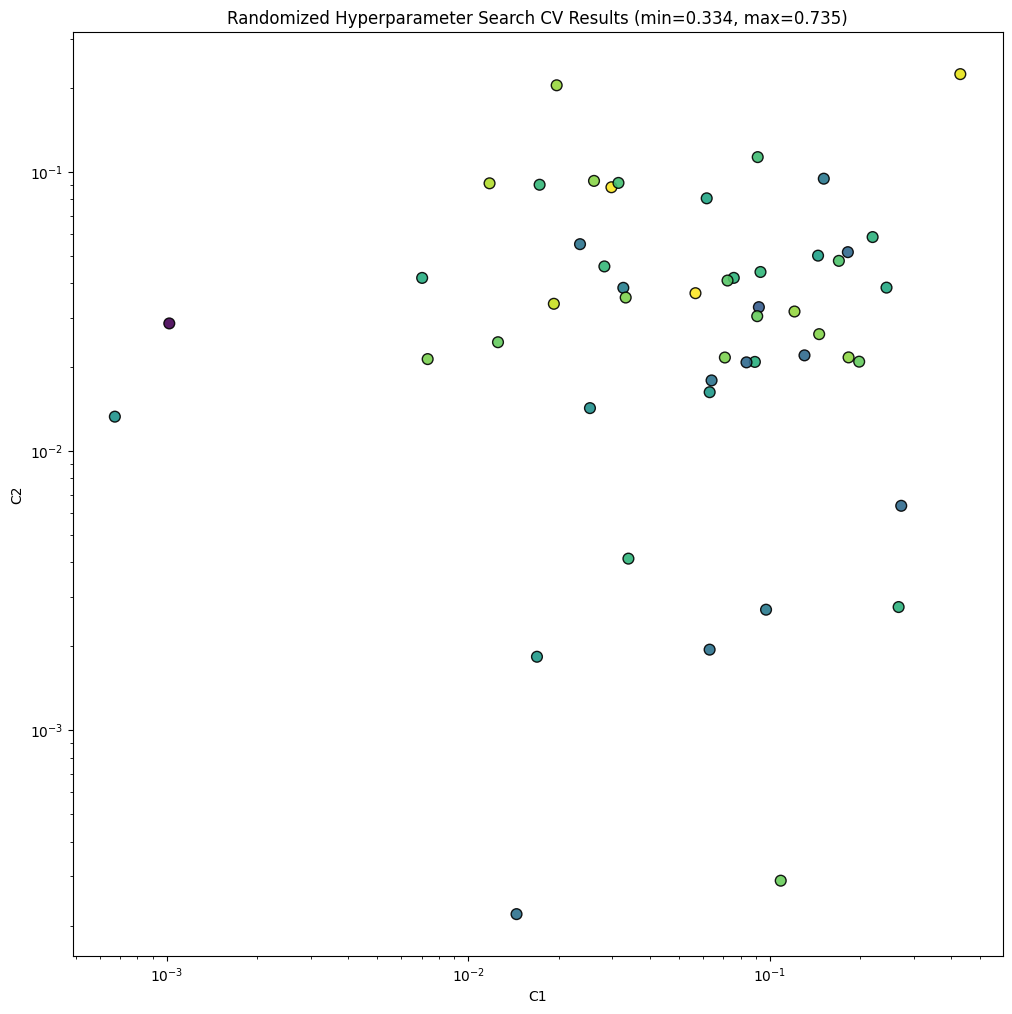

In [33]:
#print(rs.cv_results_)
_x = [s['c1'] for s in rs.cv_results_['params']]
_y = [s['c2'] for s in rs.cv_results_['params']]
_c = [s for s in rs.cv_results_['mean_score_time']]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

In [35]:
crf = rs.best_estimator_
y_pred = crf.predict(Xtest)
print(metrics.flat_classification_report(
    ytest, y_pred, labels=sorted_labels, digits=3
))

              precision    recall  f1-score   support

      B-DATE      0.733     0.611     0.667       180
      I-DATE      0.885     0.893     0.889       345
       B-LOC      0.706     0.684     0.694       256
       I-LOC      0.176     0.200     0.188        30
       B-ORG      0.687     0.475     0.561       217
       I-ORG      0.220     0.344     0.268        90
       B-PER      0.819     0.647     0.723       399
       I-PER      0.850     0.855     0.852       385

   micro avg      0.745     0.694     0.718      1902
   macro avg      0.635     0.588     0.605      1902
weighted avg      0.760     0.694     0.722      1902



In [36]:
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
I-LOC  -> I-LOC   3.344981
I-ORG  -> I-ORG   2.632436
B-DATE -> I-DATE  2.550764
B-ORG  -> I-ORG   2.534023
B-LOC  -> I-LOC   2.359503
B-PER  -> I-PER   2.310736
I-DATE -> I-DATE  2.271082
O      -> O       1.607063
I-DATE -> B-LOC   0.682219
I-PER  -> I-PER   0.679676
O      -> B-LOC   0.167310
O      -> B-DATE  0.159324
O      -> B-ORG   0.067802
O      -> B-PER   0.047198
I-PER  -> O       0.033732
B-ORG  -> B-DATE  0.007491
I-PER  -> B-DATE  0.002353
I-DATE -> B-ORG   0.000213
B-LOC  -> B-DATE  -0.000526
I-ORG  -> B-LOC   -0.190175

Top unlikely transitions:
I-LOC  -> B-LOC   -2.663649
B-LOC  -> B-LOC   -2.817735
B-ORG  -> I-DATE  -2.964340
I-PER  -> B-PER   -2.986770
B-DATE -> B-DATE  -3.008049
I-ORG  -> I-PER   -3.124413
B-PER  -> B-PER   -3.141215
I-DATE -> I-ORG   -3.247324
B-PER  -> I-ORG   -3.349716
I-DATE -> B-DATE  -3.379048
B-LOC  -> I-ORG   -3.480373
I-ORG  -> I-DATE  -3.488083
I-PER  -> I-ORG   -3.606551
B-ORG  -> I-PER   -3.624743
B-LOC  -> I-DAT

In [37]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-30:])

Top positive:
4.137301 O        BOS
3.553198 O        word.ispunctuation
3.275343 B-DATE   word[-2:]:dɛ
3.266737 B-DATE   word[:2]:20
3.235340 O        word.unaccent:l
3.181338 B-ORG    word[-2:]:eb
3.141069 B-ORG    word[-2:]:̂t
3.013767 O        word.unaccent:b
2.944115 O        word.unaccent:e
2.931817 B-ORG    word[-2:]:AC
2.904804 O        word[-2:]:tə
2.867400 B-ORG    word[-3:]:tel
2.750992 B-ORG    word[:3]:dyə
2.739059 O        word.unaccent:N
2.731705 O        word[-2:]:ɔm
2.731415 B-PER    word[-2:]:à
2.714894 B-DATE   word.unaccent:cwl
2.656152 O        word.unaccent:pu
2.647035 B-LOC    word.lower():noso
2.619886 I-DATE   word.isdigit()
2.552714 O        word.unaccent:G
2.507317 B-ORG    word[:2]:dy
2.449433 B-PER    word[-3:]:ufa
2.407621 O        word.unaccent:A
2.401207 B-DATE   word[-3:]:zʉ́
2.390363 B-LOC    word[-3:]:ala
2.351410 O        word[-2:]:əŋ
2.302675 O        word[-2:]:ʉɔ
2.300447 O        word[:2]:pu
2.298171 B-DATE   word.lower():daʼdaʼ

Top negative:
-1